The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
environ({'CHROME_DESKTOP': 'codium-url-handler.desktop', 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus', 'DEBUGINFOD_URLS': 'https://debuginfod.archlinux.org ', 'DISPLAY': ':0', 'EDITOR': 'helix', 'ELECTRON_NO_ATTACH_CONSOLE': '1', 'ELECTRON_OZONE_PLATFORM_HINT': 'wayland', 'GDK_BACKEND': 'wayland', 'GREETD_SOCK': '/run/greetd-2850.sock', 'GTK_CSD': '0', 'HOME': '/home/lowkey', 'I3SOCK': '/run/user/1000/sway-ipc.1000.4656.sock', 'INVOCATION_ID': '9c7b46140738420c85096a0185c3e416', 'JOURNAL_STREAM': '8:18098', 'LANG': 'en_GB.UTF-8', 'LC_ADDRESS': 'da_DK.UTF-8', 'LC_IDENTIFICATION': 'da_DK.UTF-8', 'LC_MEASUREMENT': 'da_DK.UTF-8', 'LC_MONETARY': 'da_DK.UTF-8', 'LC_NAME': 'da_DK.UTF-8', 'LC_NUMERIC': 'da_DK.UTF-8', 'LC_PAPER': 'da_DK.UTF-8', 'LC_TELEPHONE': 'da_DK.UTF-8', 'LC_TIME': 'da_DK.UTF-8', 'LIBSEAT_BACKEND': 'logind', 'LOGNAME': 'lowkey', 'MAIL': '/var/spool/mail/lowkey', 'MANAGERPID': '4601

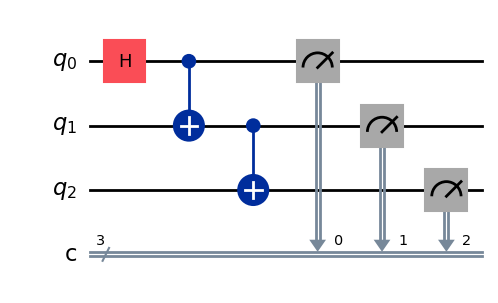

In [12]:
%load_ext dotenv
%dotenv
import os
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.visualization import plot_histogram
from qiskit import transpile, QuantumCircuit
from matplotlib import pyplot

# It is highly recommended to use environment variables.
#provider = AzureQuantumProvider(resource_id="ID HERE", location="LOCATION HERE")
workspace = Workspace(resource_id=os.environ['ID'], location=os.environ['LOCATION'])
provider = AzureQuantumProvider(workspace)
# Selecting a backend
# Use simulators to test before running it on real hardware.
backend = provider.get_backend("ionq.simulator")

circuit = QuantumCircuit(3, 3)
circuit.name = "My First Quantum Program"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

circuit.draw('mpl')


.......

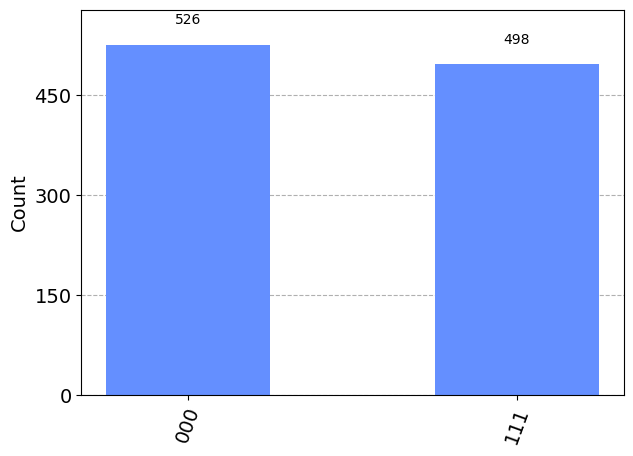

In [13]:
# Transpile circuit to work with the current backend.
qc_compiled = transpile(circuit, backend)
# Run the job
# This will cause a pop where you have to authenticate with azure.
job_sim = backend.run(qc_compiled, shots=1024)

# Get the result
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# Plot the result
plot_histogram(counts)